In [7]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

In [8]:
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"
strav = skimage.io.imread(url) / 255

In [9]:
u, sigma, vt = np.linalg.svd(strav)
frobenius_norms = []
compressed_image = np.zeros_like(strav)
for i in range(strav.shape[1]):
    compressed_image += np.outer(u[:, i], vt[i, :]) * sigma[i]
    frobenius_norms.append(np.sqrt(np.sum((strav - compressed_image)**2)))

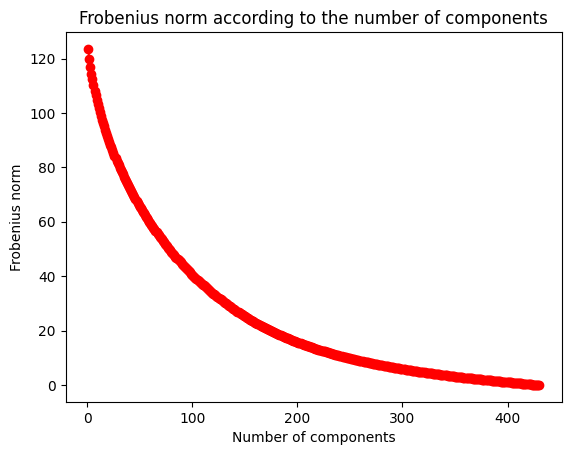

In [10]:
fig, ax = plt.subplots()
ax.set_title("Frobenius norm according to the number of components")
ax.set_xlabel("Number of components")
ax.set_ylabel("Frobenius norm")
ax.plot(range(1, len(frobenius_norms) + 1), frobenius_norms, "ro-")
plt.show()